<a href="https://colab.research.google.com/github/youngmin5068/ComputerVision/blob/main/MMdetection_faster_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openmim
!mim install mmdet

In [2]:
!git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 31759, done.
remote: Counting objects: 100% (339/339), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 31759 (delta 105), reused 266 (delta 84), pack-reused 31420
Receiving objects: 100% (31759/31759), 40.93 MiB | 17.06 MiB/s, done.
Resolving deltas: 100% (22725/22725), done.


In [ ]:
!cd mmdetection; python setup.py install

In [ ]:
!pip uninstall mmdet
!pip install openmim
!mim install mmdet

In [1]:
from mmdet.apis import init_detector, inference_detector
import mmcv

In [2]:
!cd mmdetection; mkdir checkpoints

In [ ]:
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

In [4]:
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [ ]:
model = init_detector(config_file, checkpoint_file,device='cuda:0')

In [6]:
import cv2
import matplotlib.pyplot as plt

img = '/content/mmdetection/demo/demo.jpg'

In [ ]:
results = inference_detector(model,img)

In [8]:
type(results), len(results)

(list, 80)

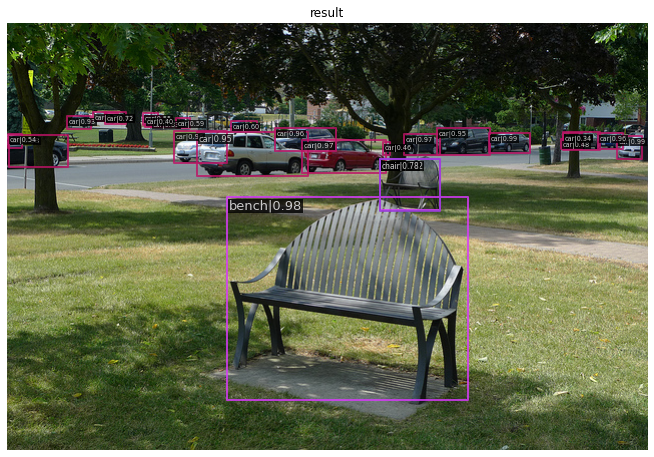

In [9]:
from mmdet.apis import show_result_pyplot

show_result_pyplot(model, img, results)

In [ ]:
model.__dict__

In [ ]:
#config 확인
print(model.cfg.pretty_text)

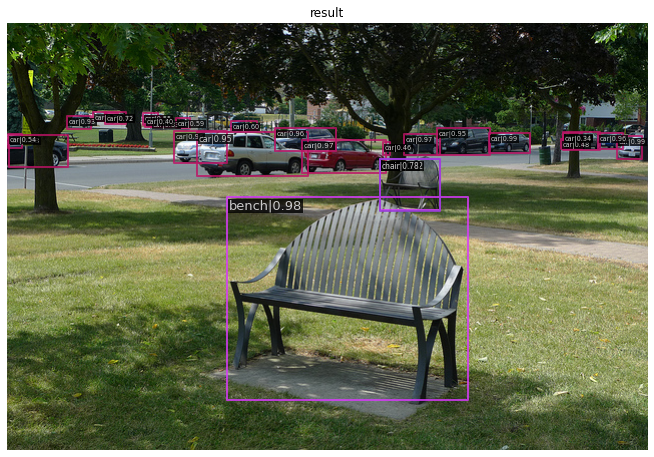

In [14]:
import cv2

#파일로 넣을 때는 BGR로 넣어야 함. (RGB로 변경 불가)

img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
results = inference_detector(model, img_arr)

show_result_pyplot(model,img_arr, results)

In [15]:
# 0부터 순차적으로 클래스 매핑된 label 적용. 
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }


In [16]:
import numpy as np

# np.where 사용법 예시.
arr1 = np.array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
         1.35454759e-01],
        [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
         8.88786465e-01],
        [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
         7.20717013e-02]], dtype=np.float32)

arr1_filtered = arr1[np.where(arr1[:,4] > 0.1)]
print(arr1_filtered)

[[3.75348572e+02 1.19171005e+02 3.81950867e+02 1.34460617e+02
  1.35454759e-01]
 [5.32362000e+02 1.09554726e+02 5.40526550e+02 1.25222633e+02
  8.88786495e-01]]


In [17]:
def get_detected_img(model, img_array, score_threshold=0.3, is_print=True):
  draw_img = img_array.copy()
  bbox_color=(0,255,0)
  text_color=(0,0,255)

  results = inference_detector(model,img_array)

  for result_idx, result in enumerate(results):
    
    if len(result)==0:
      continue
    
    result_filtered = result[np.where(result[:,4]>score_threshold)]

    for i in range(len(result_filtered)):
      left = int(result_filtered[i,0])
      top = int(result_filtered[i,1])
      right = int(result_filtered[i,2])
      bottom = int(result_filtered[i,3])
      caption="{}: {:.4f}".format(labels_to_names_seq[result_idx], result_filtered[i,4])
      cv2.rectangle(draw_img, (left,top),(right,bottom),color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left),int(top)-7), cv2.FONT_HERSHEY_SIMPLEX,0.37,text_color,1)
      if is_print:
        print(caption)
  return draw_img

car: 0.9888
car: 0.9872
car: 0.9832
car: 0.9713
car: 0.9678
car: 0.9594
car: 0.9593
car: 0.9568
car: 0.9510
car: 0.9459
car: 0.9440
car: 0.9331
bench: 0.9778


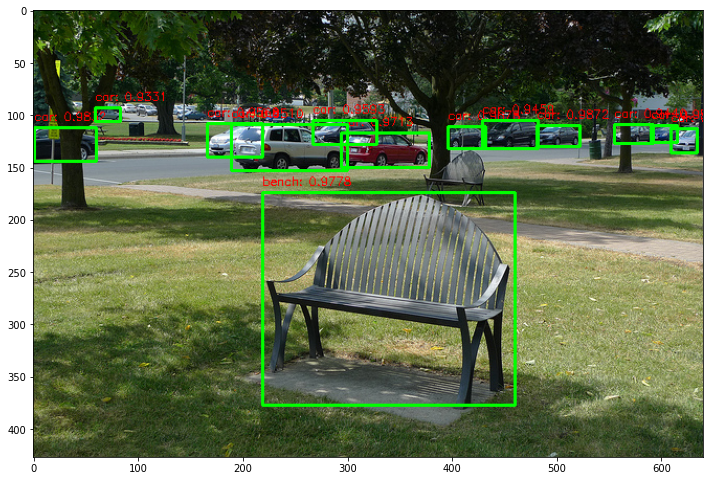

In [23]:
img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
detected_img = get_detected_img(model, img_arr,  score_threshold=0.9, is_print=True)

detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(detected_img)